# Practical Homework 1 - Linear Regression

Student Number: 400108547

Student Name: Parham Rezaei

# Phase 0: Intro

For this assignment, you'll be given a dataset containing some features of a group of people. Given those features, you will try to predict how much they tend to spend on the medical services they receive.

In [1]:
# run this cell to download the dataset
!wget -O /kaggle/working/dataset.csv "https://www.dropbox.com/scl/fi/sy3nij8fkha309jnfi7c4/dataset.csv?rlkey=cjy9gof3hyqx1wo9ali1pusbv&dl=1"

--2023-11-16 21:02:04--  https://www.dropbox.com/scl/fi/sy3nij8fkha309jnfi7c4/dataset.csv?rlkey=cjy9gof3hyqx1wo9ali1pusbv&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdb29a710e928ff16433dc0bf7a.dl.dropboxusercontent.com/cd/0/inline/CHoWwgVHR8P16b6VUsPGrdWw3VW_nUXgu1MfNHB8EudW6YUFFfUtYRzPOovbnuYTRucNwDIomafL_XZxHzT1Jp89jkhthgVZpTJRb-x4iBX0MuoRi-iIHV7pTRyHPHqSzaOsl_PQMLhnrSCU3b17STzw/file?dl=1# [following]
--2023-11-16 21:02:05--  https://ucdb29a710e928ff16433dc0bf7a.dl.dropboxusercontent.com/cd/0/inline/CHoWwgVHR8P16b6VUsPGrdWw3VW_nUXgu1MfNHB8EudW6YUFFfUtYRzPOovbnuYTRucNwDIomafL_XZxHzT1Jp89jkhthgVZpTJRb-x4iBX0MuoRi-iIHV7pTRyHPHqSzaOsl_PQMLhnrSCU3b17STzw/file?dl=1
Resolving ucdb29a710e928ff16433dc0bf7a.dl.dropboxusercontent.com (ucdb29a710e928ff16433dc0bf7a.dl.dropboxusercontent.com)... 162

In [2]:
# libraries that you allowed to use
import os
import pandas
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

# Phase 1: Explore

## Sec 1: Load and Explore **(P1-Sec1: 15 points)**

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe.

In [3]:
data = pd.read_csv("dataset.csv")

Print the names of the columns and the number of rows of the dataset **(P1-1-1: 2 points)**

In [4]:
print(data.columns)
print(len(data))

Index(['age', 'sex', 'bmi', 'children', 'smk', 'region', 'target'], dtype='object')
1070


Get a brief description of the dataset **(P1-1-2: 2 points)**

In [5]:
print(data.describe())
print("\nhere is the head of the data")
print(data.head())

               age          bmi     children        target
count  1070.000000  1070.000000  1070.000000   1070.000000
mean     39.357009    30.560397     1.107477  13346.089736
std      14.073960     6.043386     1.215983  12019.510778
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.205000     0.000000   4897.667387
50%      39.500000    30.210000     1.000000   9575.442100
75%      51.000000    34.496250     2.000000  16746.657400
max      64.000000    53.130000     5.000000  62592.873090

here is the head of the data
   age     sex    bmi  children smk     region       target
0   46  female  19.95         2  no  northwest   9193.83850
1   47  female  24.32         0  no  northeast   8534.67180
2   52  female  24.86         0  no  southeast  27117.99378
3   39  female  34.32         5  no  southeast   8596.82780
4   54  female  21.47         3  no  northwest  12475.35130


Check for missing values in the dataset **(P1-1-3: 2 points)**

In [6]:
#check for missing values
print("=====================\ncheck for nan values")
print(data.isna().any())
print("=====================\ncheck for null values")
print(data.isnull().any())

print("There is no missing data")

check for nan values
age         False
sex         False
bmi         False
children    False
smk         False
region      False
target      False
dtype: bool
check for null values
age         False
sex         False
bmi         False
children    False
smk         False
region      False
target      False
dtype: bool
There is no missing data


Use Histograms and Box-plots to visualize the distribution of numerical columns **(P1-1-4: 2 points)**

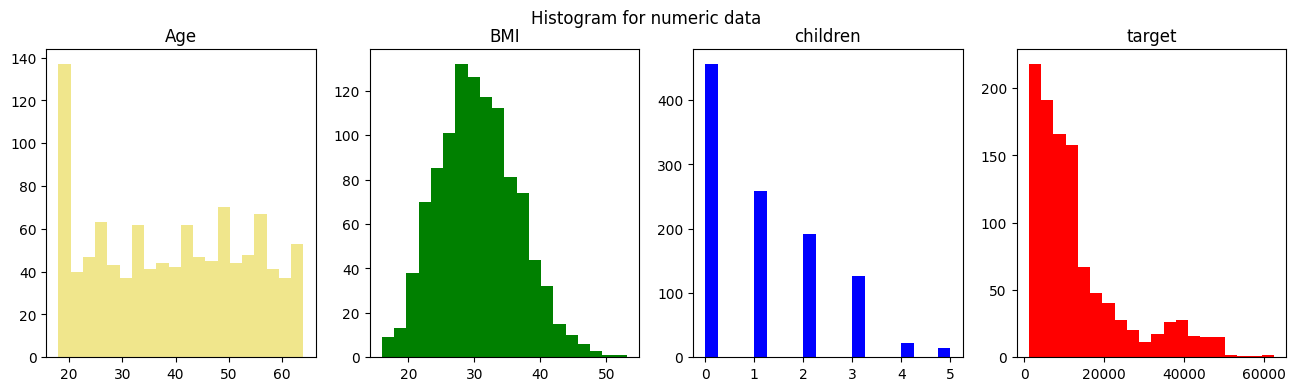

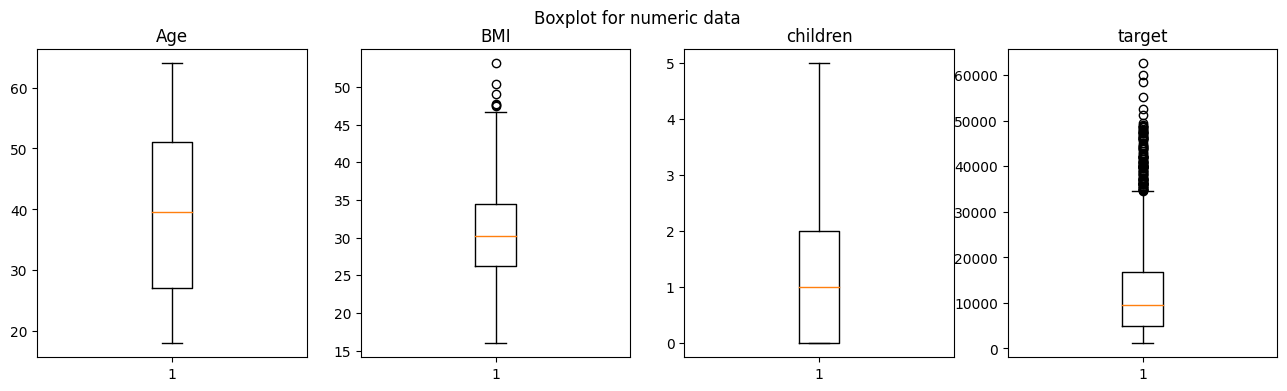

In [7]:
# histogram for age
# size of the plt figure
plt.figure(figsize=(16,4))
# set name for the whole figure
plt.suptitle("Histogram for numeric data")
# here we make 4 hist plots using plt axis
plt.subplot(1,4,1)
plt.hist(data['age'],bins = 20, 
                            color ='khaki')
plt.title("Age")
plt.subplot(1,4,2)
plt.hist(data['bmi'],bins = 20, 
                            color ='green')
#set title for the plot
plt.title("BMI")
plt.subplot(1,4,3)
plt.hist(data['children'],bins = 20, 
                            color ='blue')
plt.title("children")
plt.subplot(1,4,4)
plt.hist(data['target'],bins = 20, 
                            color ='red')
plt.title("target")
plt.show()

# plt boxplot
plt.figure(figsize=(16,4))
# set name for the whole figure
plt.suptitle("Boxplot for numeric data")
# here we make 4 hist plots using plt axis
plt.subplot(1,4,1)
#plot with edge color green
plt.boxplot(data['age'])
plt.title("Age")
plt.subplot(1,4,2)
plt.boxplot(data['bmi'])
plt.title("BMI")
plt.subplot(1,4,3)
plt.boxplot(data['children'])
plt.title("children")
plt.subplot(1,4,4)
plt.boxplot(data['target'])
plt.title("target")
plt.show()

Count the number of unique values for each class in categorical columns and compare the distributions amongst them **(P1-1-5: 5 points)**

In [8]:
# count unique values in categorical columns
print("Here is the number of unique values in each column\n")
print(data.nunique())
print("=======================\n")
# Here is the code for print number of each value in categorical columns
print("The distribution of each value in categorical columns\n")
GroupedData=data.groupby(by='smk').size()
print(GroupedData)
print("=======================")

Here is the number of unique values in each column

age           47
sex            2
bmi          494
children       6
smk            2
region         4
target      1070
dtype: int64

The distribution of each value in categorical columns

smk
no     850
yes    220
dtype: int64


In [9]:
GroupedData = data.groupby(by='sex').size()
print(GroupedData)
print("=======================")
GroupedData = data.groupby(by='region').size()
print(GroupedData)
print("=======================")

sex
female    522
male      548
dtype: int64
region
northeast    267
northwest    256
southeast    283
southwest    264
dtype: int64


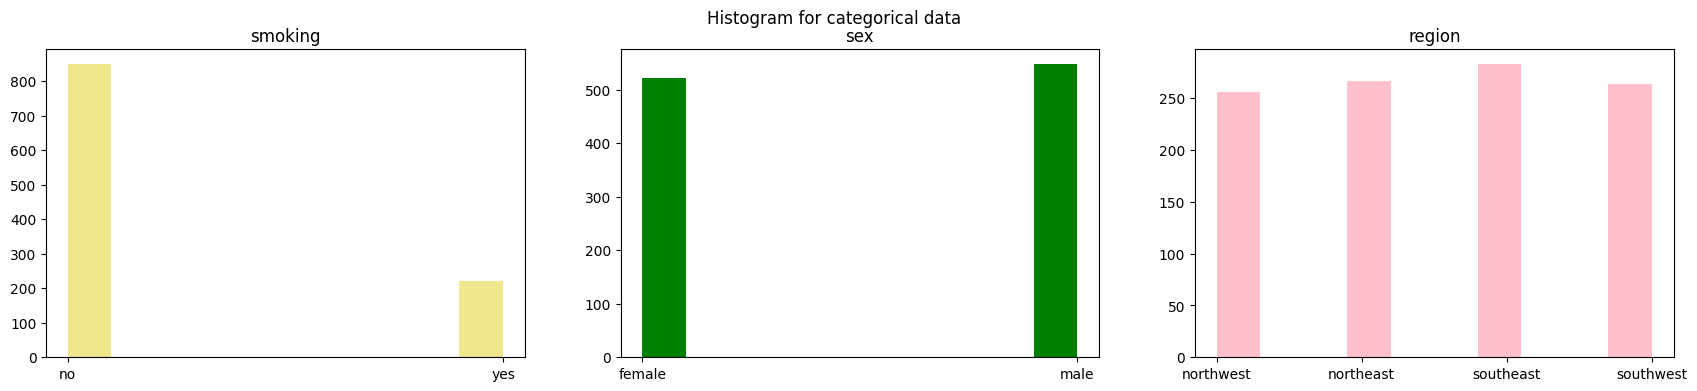

In [10]:
# print here I draw the histogram of categorical data
plt.figure(figsize=(21,4))
# set name for the whole figure
plt.suptitle("Histogram for categorical data")
# here we make 4 hist plots using plt axis
plt.subplot(1,3,1)
plt.hist(data['smk'],color ='khaki')
plt.title("smoking")
plt.subplot(1,3,2)
plt.hist(data['sex'],color="green")
plt.title("sex")
plt.subplot(1,3,3)
plt.hist(data['region'],color="pink")
plt.title("region")
plt.show()

Convert columns with string values (`sex`, `smk`, and `region`) into numerical values **(P1-1-6: 2 points)**

In [11]:
# code from scratch :)
sex = pd.factorize(data["sex"])[0]
smoker = pd.factorize(data["smk"])[0]
region = pd.factorize(data["region"])[0]
data = data.drop(["sex","smk","region"],axis=1)
data["sex"]=sex
data["smk"]=smoker
data["region"]=region
data.head()

,age,bmi,children,target,sex,smk,region
0,46,19.95,2,9193.83850,0,0,0
1,47,24.32,0,8534.67180,0,0,1
2,52,24.86,0,27117.99378,0,0,2
3,39,34.32,5,8596.82780,0,0,2
4,54,21.47,3,12475.35130,0,0,0


In [12]:
# using LabelEncoder
from sklearn.preprocessing import LabelEncoder
sex_enc = sklearn.preprocessing.LabelEncoder()
data["sex"] = sex_enc.fit_transform(data["sex"])
smk_enc = sklearn.preprocessing.LabelEncoder()
data["smk"] = smk_enc.fit_transform(data["smk"])
region_enc = sklearn.preprocessing.LabelEncoder()
data["region"] = region_enc.fit_transform(data["region"])
data.head()

,age,bmi,children,target,sex,smk,region
0,46,19.95,2,9193.83850,0,0,0
1,47,24.32,0,8534.67180,0,0,1
2,52,24.86,0,27117.99378,0,0,2
3,39,34.32,5,8596.82780,0,0,2
4,54,21.47,3,12475.35130,0,0,0


## Sec 2: Check for linear relation **(P1-Sec2: 10 points)**

Plot `age` and `smk` against `target` **(P1-2-1: 5 points)**

plotting the mean


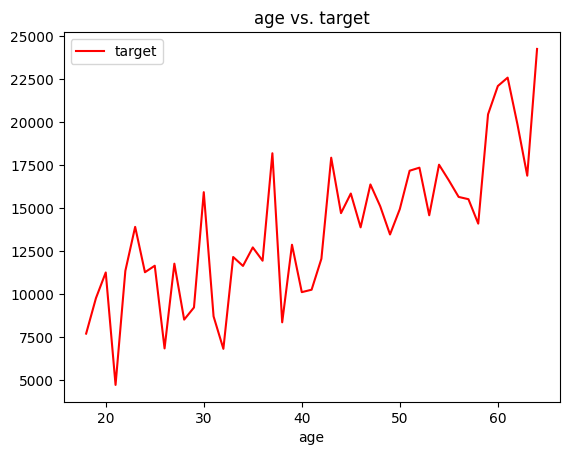

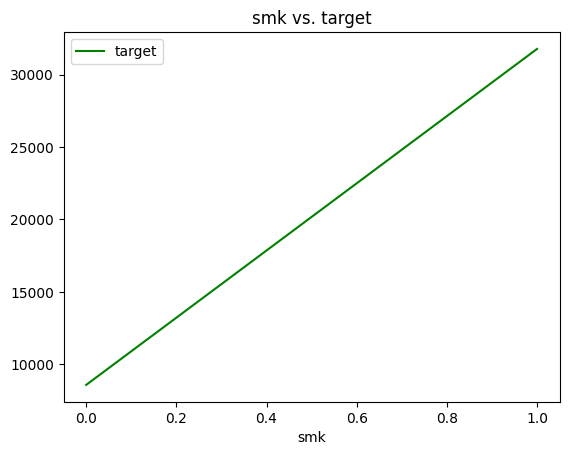

The smk one is linear 
Here I draw the sctter too


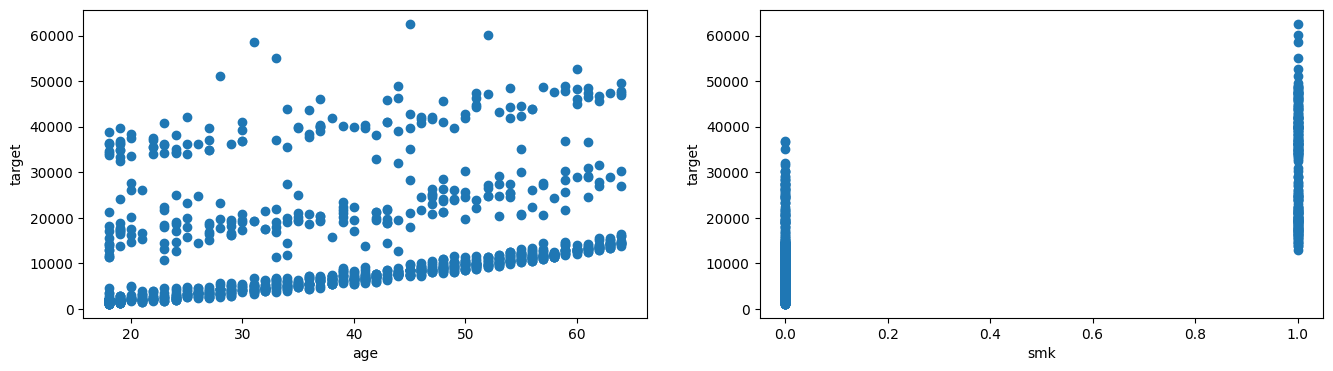

In [13]:
print("plotting the mean")
data.groupby('age').mean().reset_index().plot(x='age',y='target',title='age vs. target',color="Red")

data.groupby('smk').mean().reset_index().plot(x='smk',y='target',title='smk vs. target',color="Green")
plt.show()

print("The smk one is linear \nHere I draw the sctter too")
# plot age and smk against target
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.scatter(data["age"],data["target"])
plt.xlabel("age")
plt.ylabel("target")
plt.subplot(1,2,2)
plt.scatter(data["smk"],data["target"])
plt.xlabel("smk")
plt.ylabel("target")
plt.show()


Plot the correlation matrix for numerical features **(P1-2-2: 5 points)**

          children       age       bmi    target
children  1.000000  0.060999 -0.005040  0.071885
age       0.060999  1.000000  0.118274  0.281721
bmi      -0.005040  0.118274  1.000000  0.197316
target    0.071885  0.281721  0.197316  1.000000


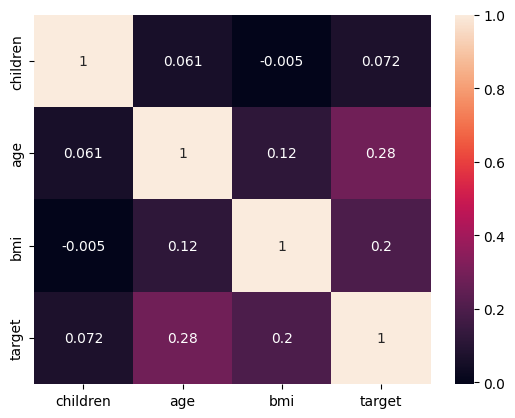

Here is the full correlation matrix
               age       bmi  children    target       sex       smk    region
age       1.000000  0.118274  0.060999  0.281721 -0.008459 -0.052035  0.006363
bmi       0.118274  1.000000 -0.005040  0.197316  0.015293 -0.003450  0.150175
children  0.060999 -0.005040  1.000000  0.071885  0.017080  0.013994 -0.024802
target    0.281721  0.197316  0.071885  1.000000  0.056802  0.780063  0.012671
sex      -0.008459  0.015293  0.017080  0.056802  1.000000  0.070908 -0.020711
smk      -0.052035 -0.003450  0.013994  0.780063  0.070908  1.000000  0.006042
region    0.006363  0.150175 -0.024802  0.012671 -0.020711  0.006042  1.000000


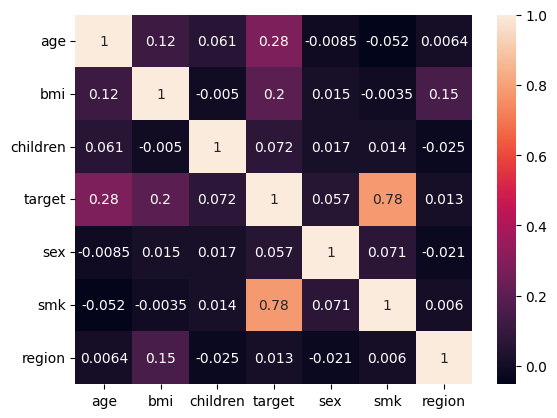

In [14]:
# get the dataframe of children,age,bmi,target
numerical_features = data[["children","age","bmi","target"]]
corr = numerical_features.corr()
print(corr)
sns.heatmap(corr,annot=True)
plt.show()
print("Here is the full correlation matrix")
corr = data.corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()


# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables **(P2-Sec1: 15 points)**

Using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)
<br>
One-hot encoding is a method for converting categorical data to numerical ones that can be fed into a model. This method works by creating a binary vector for each category. **(P2-1-1: 5 points)**

In [15]:
region = pd.get_dummies(data['region'])
print(region.head())
data = pd.concat((data, region), axis=1)
data.drop(['region'], axis=1,inplace=True)

       0      1      2      3
0   True  False  False  False
1  False   True  False  False
2  False  False   True  False
3  False  False   True  False
4   True  False  False  False


Do the same thing for the `smoker` and `sex` variable (the result should be a dataframe) **(P2-1-1: 10 points)**

In [16]:
sex = pd.get_dummies(data['sex'])
smoker = pd.get_dummies(data['smk'])
print(sex.head())
print(smoker.head())
data = pd.concat((data,sex,smoker),axis=1)
data.drop(['sex','smk'],axis=1,inplace=True)

      0      1
0  True  False
1  True  False
2  True  False
3  True  False
4  True  False
      0      1
0  True  False
1  True  False
2  True  False
3  True  False
4  True  False


In [17]:
data.head()

,age,bmi,children,target,0,1,2,3,0,1,0,1
0,46,19.95,2,9193.83850,True,False,False,False,True,False,True,False
1,47,24.32,0,8534.67180,False,True,False,False,True,False,True,False
2,52,24.86,0,27117.99378,False,False,True,False,True,False,True,False
3,39,34.32,5,8596.82780,False,False,True,False,True,False,True,False
4,54,21.47,3,12475.35130,True,False,False,False,True,False,True,False


## Sec 2: Normalization **(P2-Sec2: 10 points)**

Normalize the columns `age`, `bmi`, and `children`. After this process, they should take values between 0 and 1. **(P2-2: 10 points)**

In [18]:
data['age'] = data['age'].apply(lambda x: (x-data['age'].min())/(data['age'].max()-data['age'].min()))
data['bmi'] = data['bmi'].apply(lambda x: (x-data['bmi'].min())/(data['bmi'].max()-data['bmi'].min()))
data['children'] = data['children'].apply(lambda x: (x-data['children'].min())/(data['children'].max()-data['children'].min()))

data.head()

,age,bmi,children,target,0,1,2,3,0,1,0,1
0,0.608696,0.107345,0.4,9193.83850,True,False,False,False,True,False,True,False
1,0.630435,0.224913,0.0,8534.67180,False,True,False,False,True,False,True,False
2,0.739130,0.239440,0.0,27117.99378,False,False,True,False,True,False,True,False
3,0.456522,0.493947,1.0,8596.82780,False,False,True,False,True,False,True,False
4,0.782609,0.148238,0.6,12475.35130,True,False,False,False,True,False,True,False


# Phase 3: Training

## Sec 1: Preparing features and Targets **(P3-Sec1: 5 points)**

Extract only the features from the dataframe by removing the `target` column. <br>
Note: Do not remove the previous dataframe.

In [19]:
X = data.drop(['target'], axis=1)

Convert the new dataframe into a numpy array **(P3-1-1: 3 points)**

In [20]:
X = X.to_numpy()

Get the `target` column from the previous dataframe and convert it to another numpy array named `y` **(P3-1-2: 2 points)**

In [21]:
y = data['target'].to_numpy()

## Sec 2: Splitting the Data **(P3-Sec2: 5 points)**

Split the dataset into two parts such that the training set (denoted as `x_train` and ‍`y_train`), contains 80% of the samples. **(P3-2: 5 points)**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

## Sec 3: Linear Regression from Scratch **(P3-Sec3: 10 points)**

Complete this section with your code. **(P3-3: 10 points)**

In [24]:
class MyLinearRegression:
    def __init__(self,lamda=0):
        self.weights = None
        self.lamda = lamda
        

    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values

        No Returns
        """
        X = np.float64(np.hstack((np.ones((X.shape[0],1)),X)))
        regulizer =  np.float64(self.lamda*np.identity(X.shape[1]))
        self.weights = np.linalg.pinv(X.T.dot(X)+regulizer).dot(X.T).dot(y)
        return self

    def predict(self, X):
        """ Predicts the values after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted values
        """
        X = np.float64(np.hstack((np.ones((X.shape[0],1)),X)))
        y_predict = X.dot(self.weights)
        return y_predict

## Sec 4: Fit the model to training data **(P3-Sec4: 10 points)**

Fit a linear regressor to the data. (Use both regressors - sklearn & from scratch) **(P3-4-1: 2 points)**

In [25]:
model = MyLinearRegression().fit(x_train, y_train)

In [26]:
from sklearn.linear_model import LinearRegression
skmodel = LinearRegression().fit(x_train, y_train)

Get the coefficients of the variables (sklearn) **(P3-4-2: 3 points)**

In [27]:
print(skmodel.coef_)

[ 1.21499674e+04  1.29600946e+04  2.18752041e+03  4.15411768e+02
  4.41910854e+02 -4.54028335e+02 -4.03294287e+02 -8.24528928e+00
  8.24528928e+00 -1.17349486e+04  1.17349486e+04]


In [28]:
model.weights

array([ 3997.76009668, 12149.96743456, 12960.094609  ,  2187.52040875,
        1414.85179174,  1441.35087845,   545.41168931,   596.14573718,
        1990.63475906,  2007.12533762, -9736.0685974 , 13733.82869408])

Get the score value of sklearn regressor on train dataset (sklearn) **(P3-4-3: 5 points)**

In [29]:
skmodel.score(x_train, y_train)

0.740441362934225

# Phase 4: Evaluation

## Sec 1: Evaluate both models and compare the results **(P4-Sec1: 20 points)**

Predict the value of "y" for each "x" belonging to the "testing" set (use both regressors) **(P4-1-1: 10 points)**

In [30]:
sk_prediction = skmodel.predict(x_test)
my_prediction = model.predict(x_test)

Compute the mean squared error **(P4-1-2: 5 points)**

In [31]:

from sklearn.metrics import mean_squared_error
sk_mse = mean_squared_error(y_test, sk_prediction)
my_mse = mean_squared_error(y_test, my_prediction)
print(sk_mse)
print(my_mse)

36747124.30117958
36747124.30117955


Calculate the maximum error for each regressor **(P4-1-3: 5 points)**

In [32]:
print(max(np.abs(sk_prediction-y_test)))
print(max(np.abs(my_prediction-y_test)))

24171.38804154331
24171.388041543287


# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: https://www.kaggle.com/t/de023973d4cb4993ab6cc023a3c0ae6c<br>
You'll have to make a csv file containing two columns: `ID` and `target`, and submit the file.<br>